<a href="https://colab.research.google.com/github/PhamBaVuong/DataAnalysisDeepLearning/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving babies.csv to babies (1).csv


In [ ]:
import pandas as pd
import io

In [ ]:
datababies = pd.read_csv(io.StringIO(uploaded['babies.csv'].decode('utf-8')))

In [ ]:
datababies

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


# 1. Mô tả dữ liệu bằng các giá trị số:

1. Tính các đại lượng thống kê mô tả từ đó rút ra nhận xét về từng tập dữ liệu (cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc).

In [ ]:
import numpy as np
import seaborn as sns
from scipy.stats import kurtosis, skew

In [ ]:
datababies0 = datababies.loc[datababies['smoke'] == 0]
datababies1 = datababies.loc[datababies['smoke'] == 1]
datababies01 = datababies.loc[(datababies['smoke'] == 0 | (datababies['smoke'] == 1))]

In [ ]:
datababies01

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


In [ ]:
def Quantile0(n):
  return np.percentile(n, 0)

def Quantile25(n):
  return np.percentile(n, 25)

def Quantile50(n):
  return np.percentile(n, 50)

def Quantile75(n):
  return np.percentile(n, 75)

def IQR(n):
  return Quantile75(n) - Quantile25(n)

def Skewness(n):
  return skew(n, bias = False)

def Kurtosis(n):
  return kurtosis(n, bias = False) + 3

In [ ]:
des_babies0 =  datababies0['bwt'].describe()
des_babies0

count    742.000000
mean     123.047170
std       17.398689
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: bwt, dtype: float64

In [ ]:
des_babies1 = datababies1['bwt'].describe()
des_babies1

count    484.000000
mean     114.109504
std       18.098946
min       58.000000
25%      102.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: bwt, dtype: float64

In [ ]:
datababies01.pivot_table(index = 'smoke', values = 'bwt', aggfunc = ['count', 'min', 'max', 'mean', 'median', 'var', 'std', Quantile0, Quantile25, Quantile50, Quantile75, IQR, Skewness, Kurtosis]).rename(index = {0: 'Bà mẹ không hút thuốc', 1: 'Bà mẹ hút thuốc'})

,count,min,max,mean,median,var,std,Quantile0,Quantile25,Quantile50,Quantile75,IQR,Skewness,Kurtosis
,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt,bwt
smoke,,,,,,,,,,,,,,
Bà mẹ không hút thuốc,742,55,176,123.047170,123,302.714371,17.398689,55,113,123,134,21,-0.187363,4.052213
Bà mẹ hút thuốc,484,58,163,114.109504,115,327.571835,18.098946,58,102,115,126,24,-0.033700,3.000408


1. Xét tập dữ liệu ứng với trường hợp bà mẹ có hút thuốc

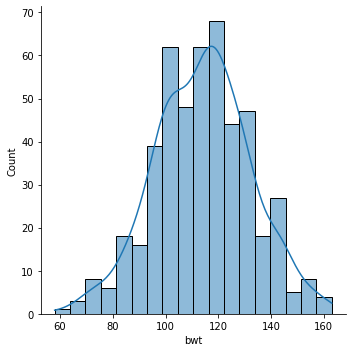

In [ ]:
sns.displot(datababies1, x = 'bwt', kde = True)

Vị trí tập trung của dữ liệu: khoảng giá trị: 114-115

Tính biến động của dữ liệu: 

Phương sai (variance): var = 327.57183495029346

Độ lệch chuẩn(standard deviation): sd = 18.09894568615237

Khoảng giá trị: min = 58, max = 163 -> range = 105

Khoảng cách giữa 2 phần tư vị: IQR = Q3 - Q1 = 126 - 102 = 24

Nhận xét: Như vậy dữ liệu phân bố gần nhau. 

Hình dạng phân bố của dữ liệu:

Độ lệch: Skewness = -0.03359497605204854

Độ bè nhọn của đỉnh dữ liệu: Kurtosis  = 2.988032478793404

Nhận xét: Như vậy dữ liệu hơi lệch về phía trái, và đỉnh nhọn, hai bên giảm với

 tốc độ vừa phải.

2. Xét tập dữ liệu ứng với trường hợp bà mẹ không hút thuốc

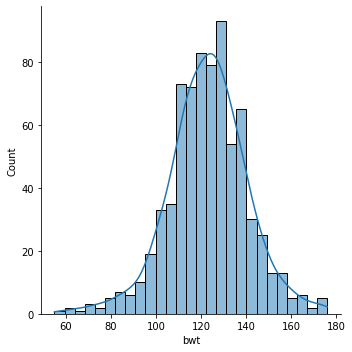

In [ ]:
sns.displot(datababies0, x = 'bwt', kde = True)

Vị trí tập trung của dữ liệu: khoảng giá trị: 123

Tính biến động của dữ liệu:

Phương sai (variance): var = 302.714371

Độ lệch chuẩn(standard deviation): sd = 17.398689

Khoảng giá trị: min = 55, max = 176 -> range = 121

Khoảng cách giữa 2 phần tư vị: IQR = Q3 - Q1 = 134 - 113 = 21

Nhận xét: Như vậy dữ liệu phân bố gần nhau.

Hình dạng phân bố của dữ liệu:

Độ lệch: Skewness = -0.187363

Độ bè nhọn của đỉnh dữ liệu: Kurtosis = 4.052213

Nhận xét: Như vậy dữ liệu hơi lệch về bên trái.

So sánh các giá trị thống kê mô tả của hai tập dữ liệu.

Sự khác biệt về vị trí tập trung dữ liệu: chênh lệch khoảng 123 - 115 = 8

Nhận xét: khác biệt không đáng kể.

In [ ]:
def Range(n):
  return max(n) - min(n)

In [ ]:
bien_dong_du_lieu_1 = datababies1.pivot_table(index = 'smoke', values = 'bwt', aggfunc = ['std', 'var', Range, IQR]).rename(index = {1: 'Chênh lệch'})

In [ ]:
bien_dong_du_lieu_0 = datababies0.pivot_table(index = 'smoke', values = 'bwt', aggfunc = ['std', 'var', Range, IQR]).rename(index = {0: 'Chênh lệch'})

In [ ]:
bien_dong_du_lieu_01 = bien_dong_du_lieu_0 - bien_dong_du_lieu_1
bien_dong_du_lieu_01

,std,var,Range,IQR
,bwt,bwt,bwt,bwt
smoke,,,,
Chênh lệch,-0.700257,-24.857464,16,-3


Dữ liệu trong trường hợp bà mẹ không hút thuốc có phân bố rộng hơn nhưng phần dữ liệu tập trung lại hẹp hơn so với trường hợp bà mẹ có hút thuốc. Sự biến động của dữ liệu trong hai trường hợp không khác biệt nhiều.

In [ ]:
hinh_dang_du_lieu_1 = datababies1.pivot_table(index = 'smoke', values = 'bwt', aggfunc = [Skewness, Kurtosis]).rename(index = {1: 'Chênh lệch'})

In [ ]:
hinh_dang_du_lieu_0 = datababies0.pivot_table(index = 'smoke', values = 'bwt', aggfunc = [Skewness, Kurtosis]).rename(index = {0: 'Chênh lệch'})

In [ ]:
hinh_dang_du_lieu_01 = hinh_dang_du_lieu_0 - hinh_dang_du_lieu_1
hinh_dang_du_lieu_01

,Skewness,Kurtosis
,bwt,bwt
smoke,,
Chênh lệch,-0.153664,1.051805


Nhận xét: trường hợp bà mẹ hút thuốc có phân bố dữ liệu nhọn hơn, đối xứng hơn so với trường hợp không hút thuốc. Cả 2 trường hợp đều hơi lệch về trái. 

# 2. Biểu diễn hình học của dữ liệu

**Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc**

Histogram trong trường hợp bà mẹ có hút thuốc:

In [ ]:
import matplotlib.pyplot as plt

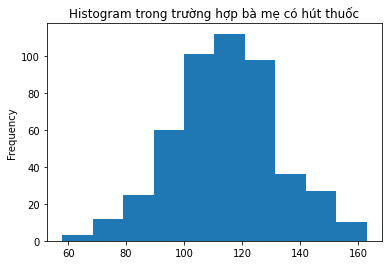

In [ ]:
datababies1['bwt'].plot.hist(title = 'Histogram trong trường hợp bà mẹ có hút thuốc')

Vị trí tập trung dữ liệu: khoảng 110

Tính biến động của dữ liệu: dữ liệu phân bố trong khoảng [50-170]

Tính đối xứng của phân bố dữ liệu: dữ liệu chỉ có 1 đỉnh. Bắt đầu từ đỉnh, hai bên giảm dần và tốc độ giảm vừa phải. 

Dữ liệu phân bố gần đối xứng, hơi lệch về phía trái. Hai bên đuôi có độ dài vừa phải. Hai bên đỉnh dữ liệu cũng phân bố vừa phải.

Giá trị ngoại lệ: không thấy rõ có giá trị ngoại lệ nào đáng kể

Boxplot trong trường hợp bà mẹ có hút thuốc

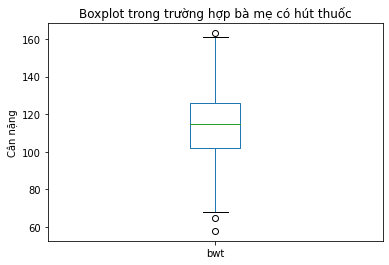

In [ ]:
datababies1['bwt'].plot.box(ylabel = 'Cân nặng', title = 'Boxplot trong trường hợp bà mẹ có hút thuốc')

Tính biến động của dữ liệu: dữ liệu phân bố tập trung trong khoảng từ [102,126]

Giá trị ngoại lệ:có một số giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 66) nhưng không nhiều.

**Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ không hút thuốc**

Histogram trong trường hợp bà mẹ không hút thuốc:

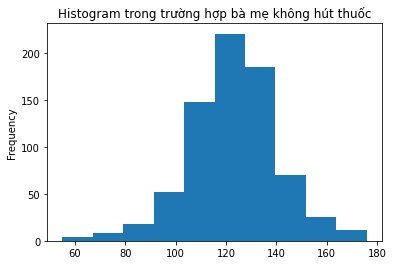

In [ ]:
datababies0['bwt'].plot.hist(title = 'Histogram trong trường hợp bà mẹ không hút thuốc')

Vị trí tập trung dữ liệu: khoảng 120

Tính biến động của dữ liệu: dữ liệu phân bố trong khoảng [50-180]

Tính đối xứng của phân bố dữ liệu: dữ liệu chỉ có 1 đỉnh. Bắt đầu từ đỉnh, hai bên giảm dần và tốc độ giảm vừa phải.

Dữ liệu phân bố gần đối xứng, hơi lệch về phía trái. Hai bên đuôi có độ dài vừa phải. Hai bên đỉnh dữ liệu cũng phân bố vừa phải.

Giá trị ngoại lệ: không thấy rõ có giá trị ngoại lệ nào đáng kể

Boxplot trong trường hợp bà mẹ không hút thuốc

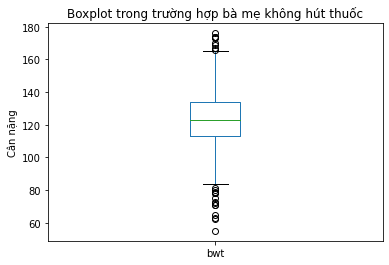

In [ ]:
datababies0['bwt'].plot.box(ylabel = 'Cân nặng', title = 'Boxplot trong trường hợp bà mẹ không hút thuốc')

Tính biến động của dữ liệu: dữ liệu phân bố tập trung trong khoảng từ [115, 133]

Giá trị ngoại lệ: có nhiều giá trị ngoại lệ (lớn hơn 165, nhỏ hơn 82).

**So sánh hai tập dữ liệu dựa vào các biểu diễn hình học**

Histogram

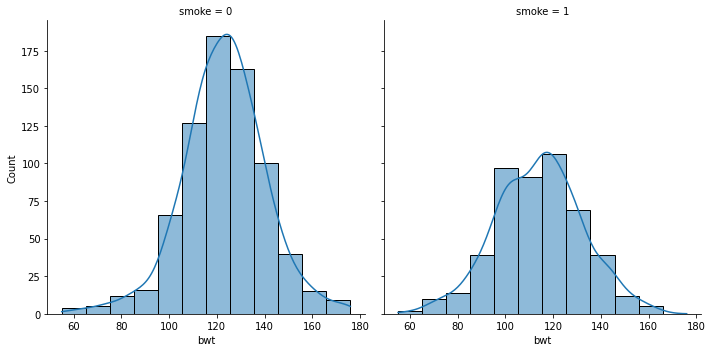

In [ ]:
sns.displot(datababies01, x = 'bwt', col = 'smoke', kde = True, bins = 12)

Cân nặng của trẻ trong trường hợp bà  mẹ không hút thuốc cao hơn so với trường hợp bà mẹ có hút thuốc 

Tính biến thiên của 2 tập dữ liệu: tương tự nhau

Tính đối xứng của 2 tập dữ liệu: tương tự nhau

Giá trị ngoại lệ: cả 2 đều không có giá trị ngoại lệ đáng chú ý.

Boxplot

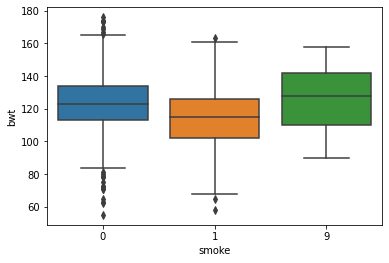

In [ ]:
sns.boxplot(x = 'smoke' , y = 'bwt', data = datababies)

Khác biệt về vị trí: giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ có hút thuốc (123 và 115). (Trường hợp smoke = 9 là trường hợp không biết bà mẹ có hút thuốc hay không, trung vị trong trường hợp này cao hơn so với 2 trường hợp bà mẹ có hút thuốc và không hút thuốc).

Giá trị ngoại lệ: cả 2 trường hợp đều có giá trị ngoại lệ trên và dưới. Trường hợp không hút thuốc có nhiều giá trị ngoại lệ hơn. 

QQ-plot

In [ ]:
import statsmodels.api as sm
import pylab as py

QQ-plot trong trường hợp bà mẹ có hút thuốc

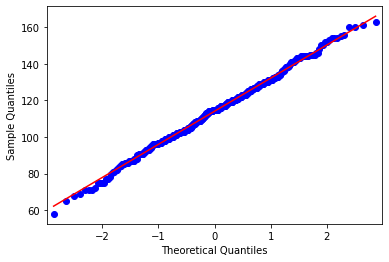

In [ ]:
sm.qqplot(datababies1['bwt'], line = 's')
py.show()

QQ-plot trong trường hợp bà mẹ không hút thuốc

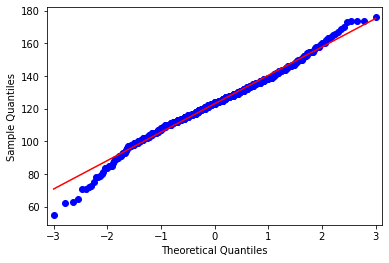

In [ ]:
sm.qqplot(datababies0['bwt'], line = 's')
py.show()

Các độ lệch từ đường thẳng của cả 2 trường hợp là tối thiểu. Điều này cho thấy phân phối bình thường.

Giá trị ngoại lệ: cả 2 trường hợp đều không có giá trị ngoại lệ đáng chú ý

QQ-plot có dạng đường thẳng, suy ra dữ liệu của 2 trường hợp có phân bố tương tự nhau.